In [1]:
#little notebook to compare shot noise from david's ultra large scales paper, and the table we use for LSST

%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize
from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock


matplotlib.rcParams['figure.figsize'] = (7, 5)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 24
P.rc('xtick', labelsize=18) 
P.rc('ytick', labelsize=18)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)


from magmod import *
# from magbias_experiments import SKA_zhangpen, CLAR_zhangpen, SKA, cb_hirax as hirax, hirax512, LSST, LSST_nosgfit, n
from lf_photometric import nz_distribution
from magbias_experiments import LSST

sigma_8_BBKS = 0.833959881058


In [2]:
#background redshift for galaxy sample:
ztab = np.linspace(0.4,2.0, 9) #crude array to compare both N(z) functions...
dz = 0.2

NINT = 200

zmintab = ztab - dz/2
zmaxtab = ztab + dz/2

#calculate the N(z) using the .txt file for best max lum
zztab, dNdztab = np.loadtxt(LSST["dNdz"], unpack = True)

#using function from David Alonso:

dNdzinterp = interp1d(zztab, dNdztab, kind='linear', bounds_error=False)

Nznew = np.zeros(len(ztab))
Nz = np.zeros(len(ztab))

for i in range(len(ztab)):
    z = ztab[i]
    zmin = zmintab[i]
    zmax = zmaxtab[i]
    z_integrate = np.linspace(zmin,zmax, NINT)
    dNdztabnew = np.array([nz_distribution(zzz, 27, "all")[0] for zzz in z_integrate])


    dNzdOm = np.trapz(dNdzinterp(z_integrate), z_integrate)
    dNzdOmnew = np.trapz(dNdztabnew, z_integrate)

    Nznew[i] =  dNzdOmnew / (np.pi/180)**2 * 4 * np.pi  #changing degrees to rad, and multiplying with survey area
    Nz[i] = dNzdOm / (np.pi/180)**2 * 4 * np.pi  #changing degrees to rad, and multiplying with survey area

In [3]:
print (Nz - Nznew)/Nz

[0.96785518 0.96806338 0.96827762 0.96848696 0.96882916 0.96934545
 0.96969609 0.9700031  0.97042373]


Text(0.5,1,'our galaxy numbers agree pretty well:')

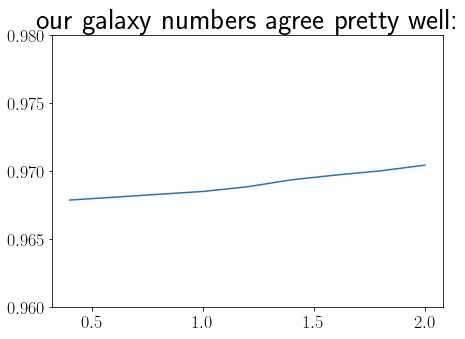

In [4]:
fig = P.figure(); ax = fig.add_subplot(111);
ax.plot(ztab, (Nz-Nznew)/Nz)# / (np.pi/180)**2 )
# ax.plot(ztab, Nznew, ls = ":") #max rmax for LSST

ax.set_ylim((0.96,.98))
ax.set_title("our galaxy numbers agree pretty well:")

In [5]:
zz = 1.
zint = np.linspace(0,zz,100)
magtab = np.linspace(22,27,20)

Ntab = np.zeros(len(magtab))
for i in range(len(magtab)):
    mm = magtab[i]
    ntab = np.array( [nz_distribution(zzz, mm, "all")[0] for zzz in zint])
    Ntab[i] = np.trapz(ntab, zint) / (np.pi/180)**2 * 4 * np.pi
print Ntab

[4.96657818e+06 6.34865967e+06 8.07327331e+06 1.02000459e+07
 1.27845435e+07 1.58744025e+07 1.95078032e+07 2.37144213e+07
 2.85180906e+07 3.39400998e+07 4.00022646e+07 4.67293340e+07
 5.41506475e+07 6.23011652e+07 7.12220603e+07 8.09610512e+07
 9.15726106e+07 1.03118142e+08 1.15666176e+08 1.29292625e+08]


In [6]:
shotnoisetab = np.array([shotnoise(0.5, 0.499, LSST, MAXMAG =mm) for mm in magtab])

We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating N(z)
shot noise for LSST!
We use all sky for calculating 

Text(0,0.5,'$N_\\mathrm{shot}$')

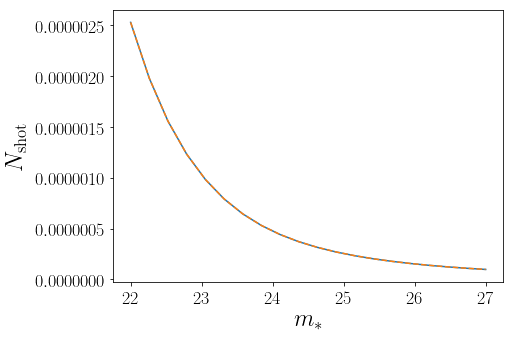

In [7]:
fig = P.figure(); ax= fig.add_subplot(111);
ax.plot(magtab, 4*np.pi/Ntab)
ax.plot(magtab, shotnoisetab, ls = "--")

ax.set_xlabel("$m_*$")
ax.set_ylabel("$N_\mathrm{shot}$")